##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

08/02/2021  02:16 PM    <DIR>          .
08/02/2021  02:16 PM    <DIR>          ..
08/02/2021  02:04 PM    <DIR>          .ipynb_checkpoints
08/02/2021  02:01 PM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/02/2021  02:15 PM    <DIR>          8_2_2021
08/02/2021  02:15 PM            31,422 C' v. Z for 1nm thick sample 06-28-2021.png
08/02/2021  02:15 PM             6,179 C' v. Z for varying sample thickness, 06-28-2021.png
08/02/2021  02:15 PM             5,715 Cz v. Z for varying sample thickness, 06-28-2021.png
08/02/2021  02:15 PM    <DIR>          FortranOutputTest
07/28/2021  11:43 AM    <DIR>          PythonOutputTest
07/28/2021  11:49 AM            57,907 Tirmzi_istep4.ipynb
08/02/2021  02:16 PM           134,865 Tirmzi_istep4-Copy1.ipynb
07/28/2021  11:43 AM           113,265 Tirmzi_istep4-Copy2.ipynb
    

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("8_2_2021/*/")
folders


['8_2_2021\\0309-VariedNuni_8_2_2021-0000 (1)\\',
 '8_2_2021\\0311-VariedNuni_8_2_2021-0001 (1)\\',
 '8_2_2021\\0313-VariedNuni_8_2_2021-0002 (1)\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'Z-U.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'8_2_2021\\0309-VariedNuni_8_2_2021-0000 (1)\\': {'z': array([150.    , 152.0001, 153.9999, 156.    , 158.0001, 159.9999,
         162.    , 164.0001, 165.9999, 168.    , 170.0001, 171.9999,
         174.    , 176.0001, 177.9999, 180.    , 182.0001, 183.9999,
         186.    , 188.0001, 189.9999, 192.    , 194.0001, 195.9999,
         198.    , 200.0001, 201.9999, 204.    , 206.0001, 207.9999,
         210.    , 212.0001, 213.9999, 216.    , 218.0001, 219.9999,
         222.    , 224.0001, 225.9999, 228.    , 230.0001, 231.9999,
         234.    , 236.0001, 237.9999, 240.    , 242.0001, 243.9999,
         246.    , 248.0001, 249.9999]),
  'c': array([1.70048940e-15, 5.81749306e+05, 1.70009620e-15, 5.93635736e+05,
         5.95317218e+05, 5.91558808e+05, 5.88284790e+05, 5.71412836e+05,
         4.83724059e+05, 5.70018028e+05, 5.84566526e+05, 6.01865353e+05,
         5.86979479e+05, 5.85711677e+05, 5.80515784e+05, 5.79279167e+05,
         5.65278832e+05, 5.73983947e+05, 1.69703912e-15,

In [9]:
all_data.keys()

dict_keys(['8_2_2021\\0309-VariedNuni_8_2_2021-0000 (1)\\', '8_2_2021\\0311-VariedNuni_8_2_2021-0001 (1)\\', '8_2_2021\\0313-VariedNuni_8_2_2021-0002 (1)\\'])

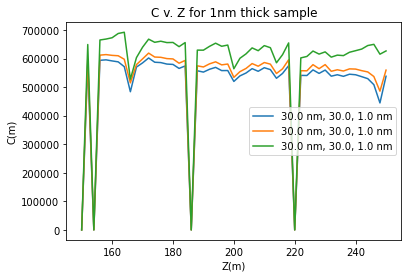

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

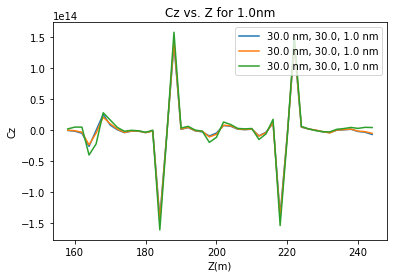

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

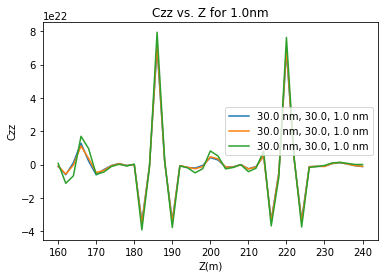

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 1000,
 'm+': 1000,
 'm-': 2,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 250.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 15000.0,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 999.99,
 'eps_r': 30.0,
 'Thickness_sample': 1.0,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 1,
 'Nuni': 100,
 'Equally spaced': False}

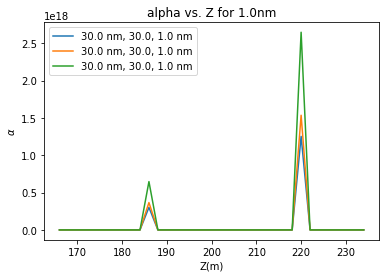

In [17]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [21]:
data

{'z': array([150.    , 152.0001, 153.9999, 156.    , 158.0001, 159.9999,
        162.    , 164.0001, 165.9999, 168.    , 170.0001, 171.9999,
        174.    , 176.0001, 177.9999, 180.    , 182.0001, 183.9999,
        186.    , 188.0001, 189.9999, 192.    , 194.0001, 195.9999,
        198.    , 200.0001, 201.9999, 204.    , 206.0001, 207.9999,
        210.    , 212.0001, 213.9999, 216.    , 218.0001, 219.9999,
        222.    , 224.0001, 225.9999, 228.    , 230.0001, 231.9999,
        234.    , 236.0001, 237.9999, 240.    , 242.0001, 243.9999,
        246.    , 248.0001, 249.9999]),
 'c': array([1.70837364e-15, 6.48949429e+05, 1.70797902e-15, 6.64811224e+05,
        6.68058822e+05, 6.72663919e+05, 6.87566407e+05, 6.91928648e+05,
        5.27553669e+05, 6.03060873e+05, 6.39335769e+05, 6.67709730e+05,
        6.56722699e+05, 6.60509757e+05, 6.55720075e+05, 6.56181345e+05,
        6.41471920e+05, 6.55824067e+05, 1.70490984e-15, 6.29354584e+05,
        6.29178969e+05, 6.42515149e+05, 6.5365

In [22]:
from scipy.optimize import curve_fit


In [23]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [24]:
all_data.keys()

dict_keys(['8_2_2021\\0309-VariedNuni_8_2_2021-0000 (1)\\', '8_2_2021\\0311-VariedNuni_8_2_2021-0001 (1)\\', '8_2_2021\\0313-VariedNuni_8_2_2021-0002 (1)\\'])

In [25]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)